In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gaussian_process import *

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year

df['time_step'] = (df['date_time'] - pd.Timestamp("2012-10-02 09:00:00")) // pd.Timedelta(hours=1)

# Training data
df_train = df[df['date_time'].dt.year == 2017]
df_test = df[(df['date_time'].dt.year == 2018) & (df['month']==1)]


X_train = df_train[['time_step']]
X_test = df_test[['time_step']]

y_train = df_train['traffic_volume']
y_test = df_test['traffic_volume']

In [37]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day_of_week,month,year,time_step
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,10,2012,0
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10,2012,1
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,10,2012,2
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,10,2012,3
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,10,2012,4


/var/folders/8f/v34l03w119d4v170lxnh3y380000gn/T/ipykernel_4582/2757169972.py:7: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.sqrt(np.diag(cov_s))


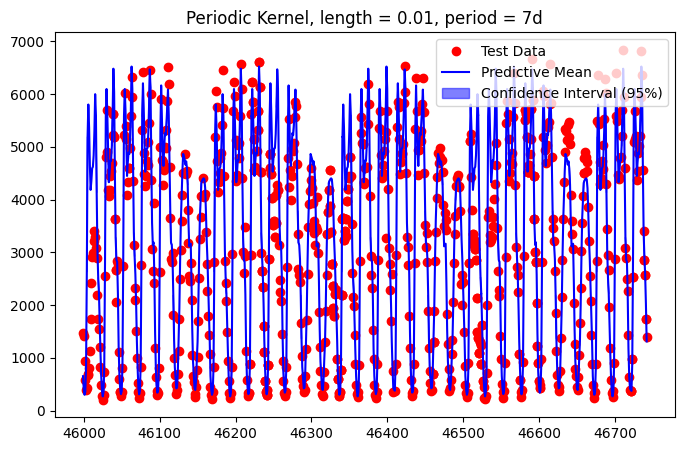

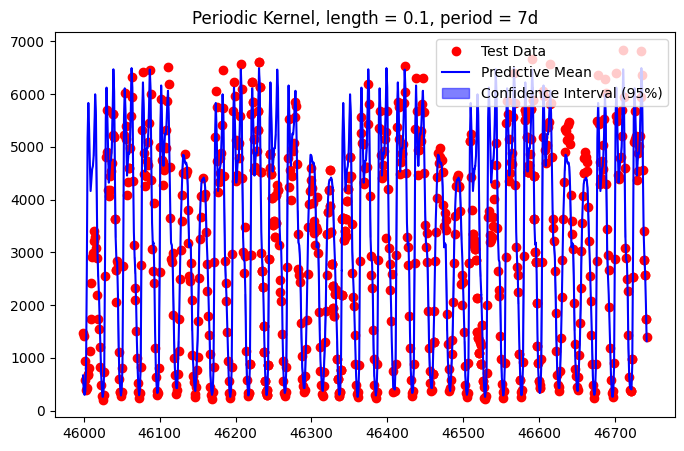

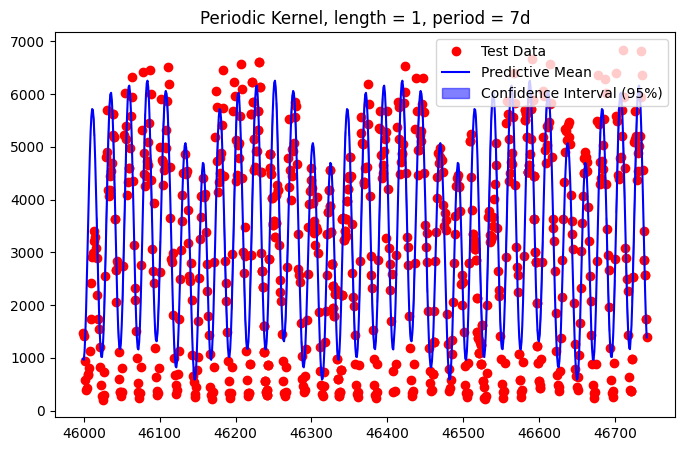

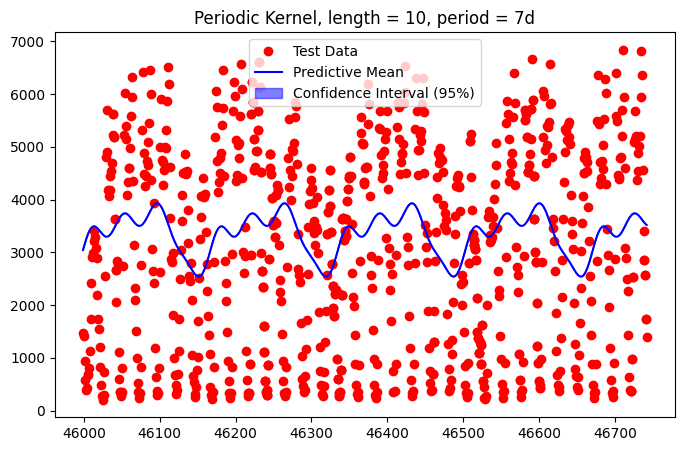

RMSE: 777.256766155791
RMSE: 777.2794529410852
RMSE: 1101.6491892734357
RMSE: 1862.3765001869829


In [29]:
lst_rmse = []
for l in [0.01, 0.1, 1, 10]:

    # learn gp model
    mu_s, cov_s = gp_posterior(X_train, y_train, X_test, periodic_kernel, length_scale = l, period = 7*24)

    stdv = np.sqrt(np.diag(cov_s))
    upper = mu_s + 2 * stdv
    lower = mu_s - 2 * stdv

    lst_rmse.append(rmse(y_test, mu_s))
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(X_test, y_test, 'ro', label='Test Data')

    plt.plot(X_test, mu_s, 'b-', label='Predictive Mean')
    plt.fill_between(X_test, lower, upper, color='blue', alpha=0.5, label='Confidence Interval (95%)')
    plt.title(f"Periodic Kernel, length = {l}, period = 7d")
    plt.legend()
    plt.show()

for i in range(4):
    print(f'RMSE: {lst_rmse[i]}')

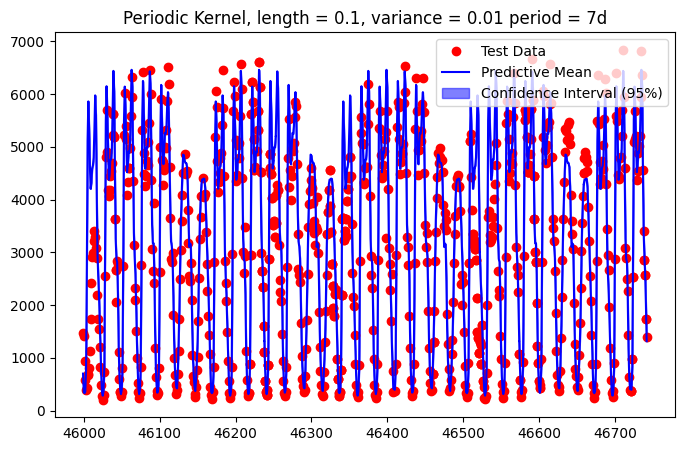

/var/folders/8f/v34l03w119d4v170lxnh3y380000gn/T/ipykernel_4582/383574871.py:8: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.sqrt(np.diag(cov_s))


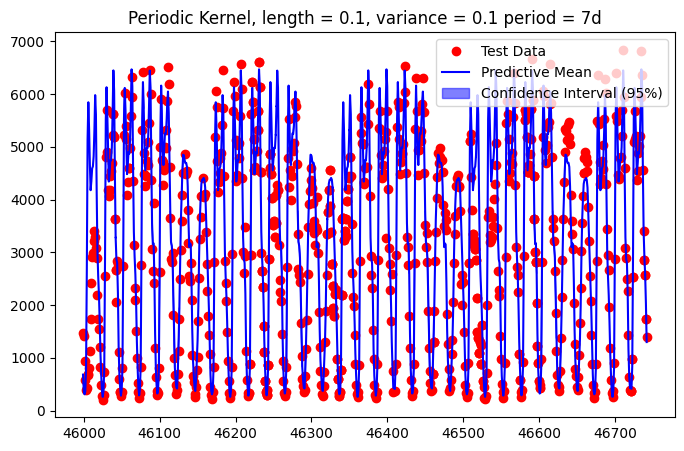

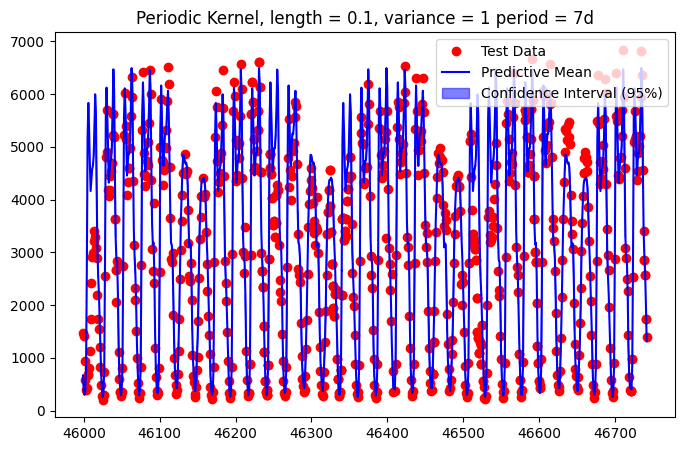

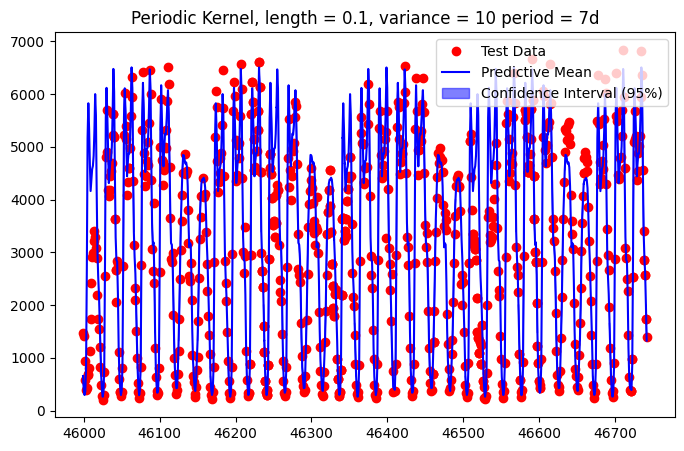

RMSE: 777.8252435908272
RMSE: 777.4469653785576
RMSE: 777.2794529410852
RMSE: 777.3533375430059


In [30]:
lst_rmse = []

for v in [0.01, 0.1, 1, 10]:
    l = 0.1
    # learn gp model
    mu_s, cov_s = gp_posterior(X_train, y_train, X_test, periodic_kernel, length_scale = l, variance = v, period = 7*24)

    stdv = np.sqrt(np.diag(cov_s))
    upper = mu_s + 2 * stdv
    lower = mu_s - 2 * stdv

    lst_rmse.append(rmse(y_test, mu_s))

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(X_test, y_test, 'ro', label='Test Data')

    plt.plot(X_test, mu_s, 'b-', label='Predictive Mean')
    plt.fill_between(X_test, lower, upper, color='blue', alpha=0.5, label='Confidence Interval (95%)')
    plt.title(f"Periodic Kernel, length = {l}, variance = {v} period = 7d")
    plt.legend()
    plt.show()

for i in range(4):
    print(f'RMSE: {lst_rmse[i]}')

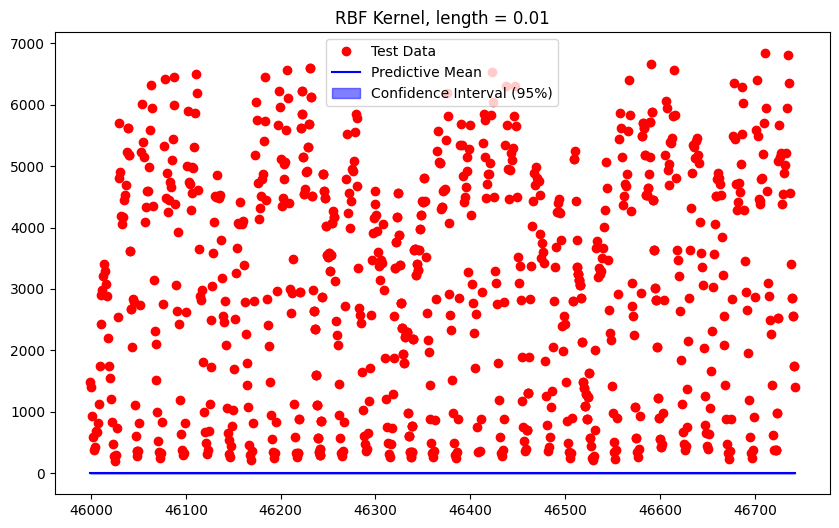

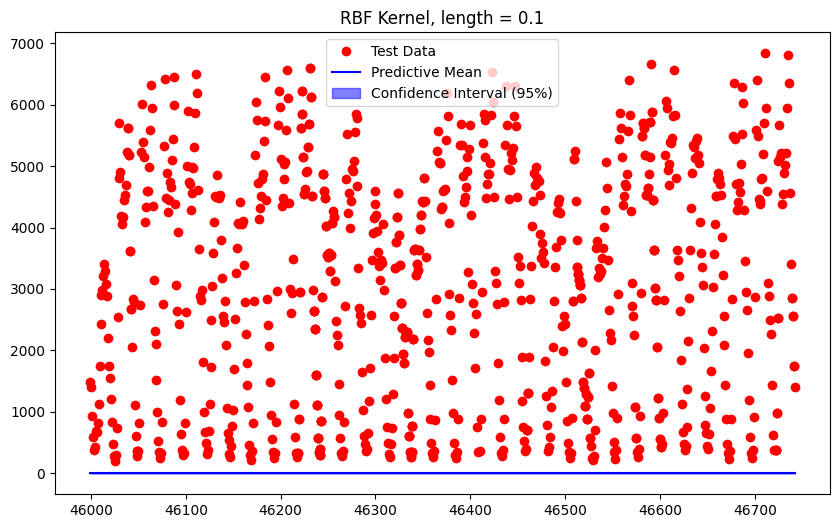

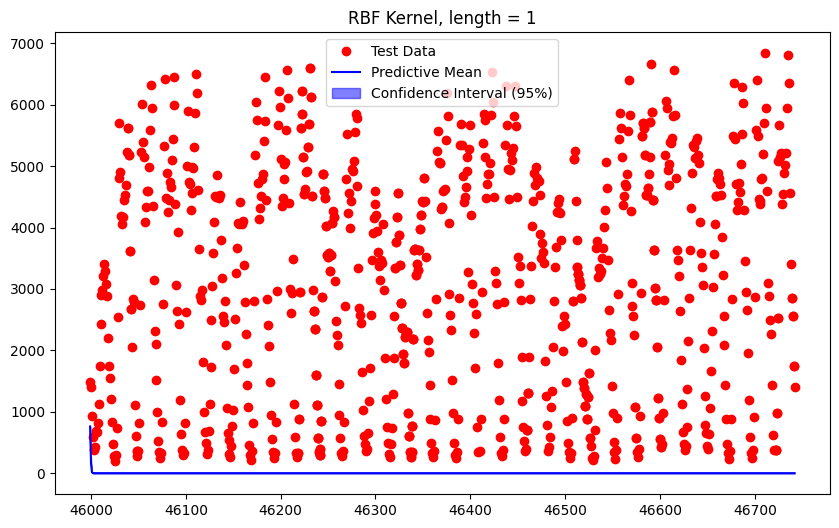

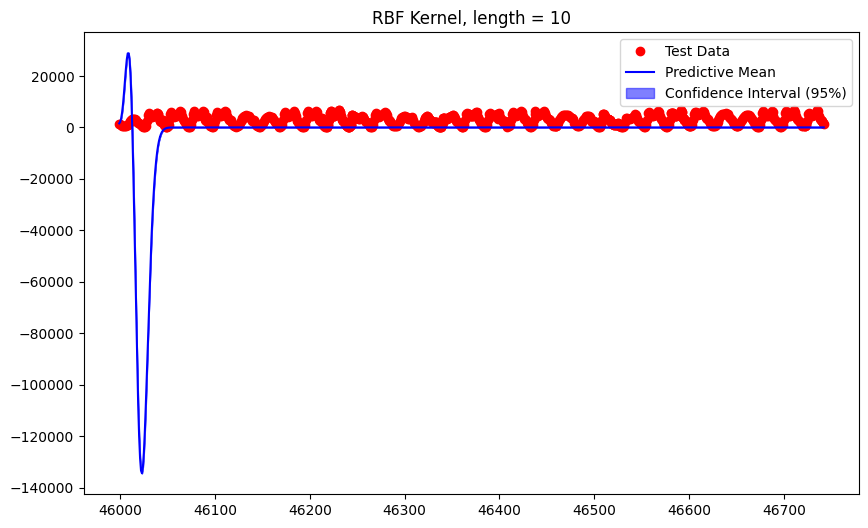

/var/folders/8f/v34l03w119d4v170lxnh3y380000gn/T/ipykernel_4582/1366509118.py:5: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.sqrt(np.diag(cov_s))


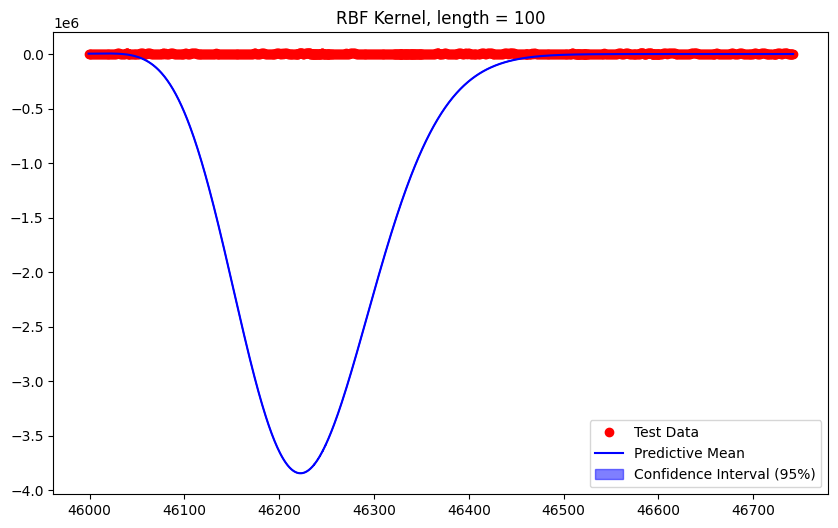

In [31]:
for l in [0.01, 0.1, 1, 10, 100]:
    # learn gp model
    mu_s, cov_s = gp_posterior(X_train, y_train, X_test, rbf_kernel, length_scale = l)

    stdv = np.sqrt(np.diag(cov_s))
    upper = mu_s + 2 * stdv
    lower = mu_s - 2 * stdv

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(X_test, y_test, 'ro', label='Test Data')

    plt.plot(X_test, mu_s, 'b-', label='Predictive Mean')
    plt.fill_between(X_test, lower, upper, color='blue', alpha=0.5, label='Confidence Interval (95%)')
    plt.title(f"RBF Kernel, length = {l}")
    plt.legend()
    plt.show()

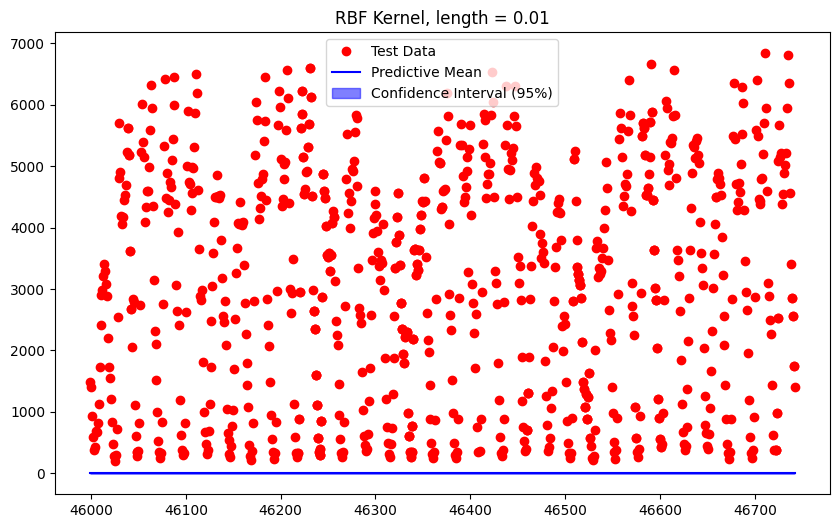

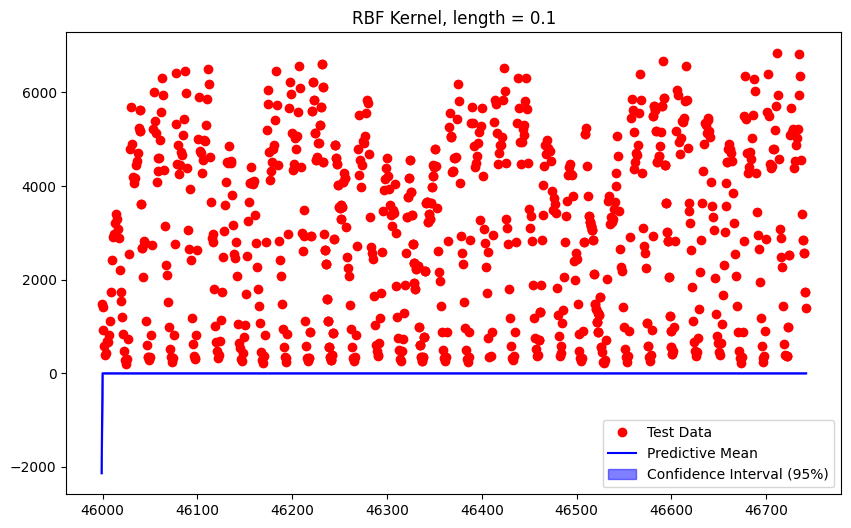

/var/folders/8f/v34l03w119d4v170lxnh3y380000gn/T/ipykernel_4582/374991075.py:5: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.sqrt(np.diag(cov_s))


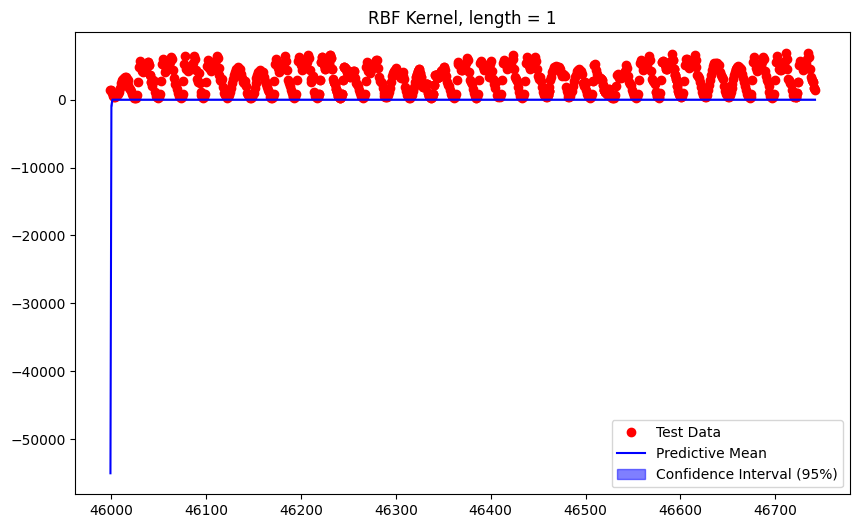

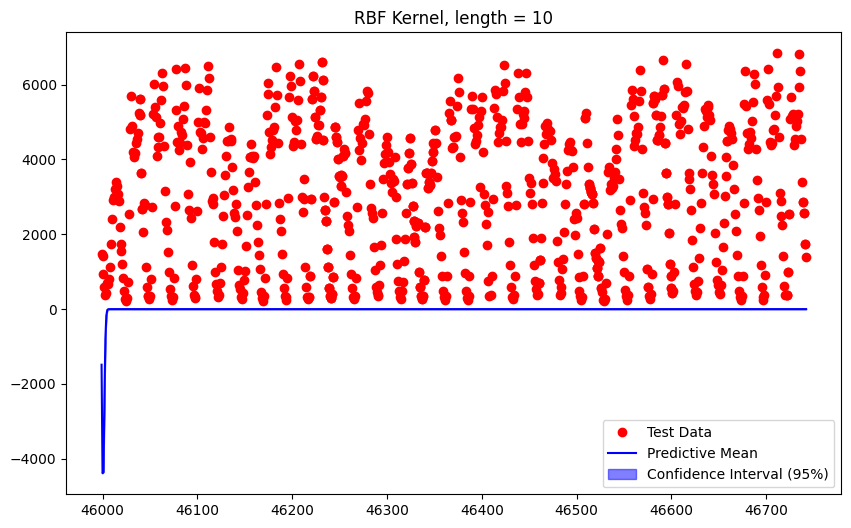

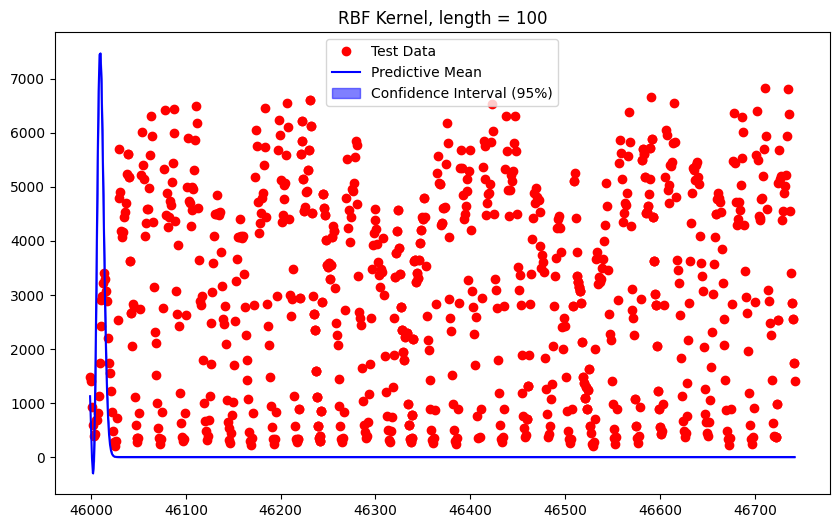

In [32]:
for l in [0.01, 0.1, 1, 10, 100]:
    # learn gp model
    mu_s, cov_s = gp_posterior(X_train, y_train, X_test, matern_kernel, length_scale = l)

    stdv = np.sqrt(np.diag(cov_s))
    upper = mu_s + 2 * stdv
    lower = mu_s - 2 * stdv

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(X_test, y_test, 'ro', label='Test Data')

    plt.plot(X_test, mu_s, 'b-', label='Predictive Mean')
    plt.fill_between(X_test, lower, upper, color='blue', alpha=0.5, label='Confidence Interval (95%)')
    plt.title(f"Matern Kernel, length = {l}")
    plt.legend()
    plt.show()